In [3]:
Path = "/Users/jonasserry/Google Drive/GDFT-Net"

import sys
sys.path.append(Path+"/Core")

from Core import GDFT_Net

import numpy as np
import matplotlib.pyplot as plt

Data Version: 1.40
Net Version: 1.52


In [14]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [1]:
sizes = (32,64,128,256,512)
Network.pkl

1500
900
500
800
300


Text(0, 0.5, 'RMSE ($\\lambda_0$)')

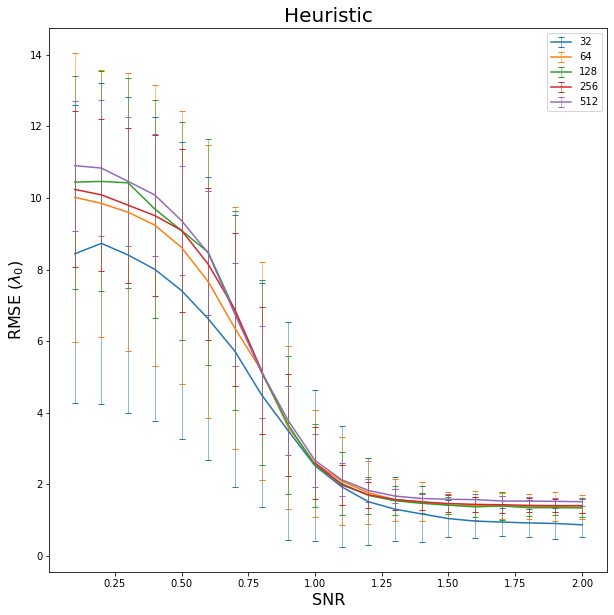

In [13]:
plt.figure(figsize=(10,10))

for size in sizes:
    Net = GDFT_Net.load_GDFT_Net("/Users/jonasserry/Google Drive/GDFT-Net/Saved_Models/Saved_Nets/({0}x64)Network.pkl".format(size))
    Net.load_Data_from_file("/Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Results/Test_Data({0}x64).npy".format(size))
    means,SNRs,stds,standard_dev = Net.get_RMSE_Data()
    print(len(Net.RMSEs[0.1]))
    plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5,label=size) 

plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Heuristic",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)


In [ ]:
i=0
plt.figure(figsize=(10,10))
while i<len(dims):
    plt.errorbar(SNRs,Means[i],yerr=STDS[i],capsize=3,elinewidth=0.5,label=dims[i]) 
    i+=1

plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Heuristic",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)


# SETS

In [1]:
Path = "/Users/jonasserry/Google Drive/GDFT-Net"

import sys
sys.path.append(Path+"/Core")

from Core import GDFT_Data
import numpy as np
import matplotlib.pyplot as plt

Data Version: 1.40


In [40]:
Nums = np.full(20,50)
SNRs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
print(Nums)
print(np.sum(Nums))


[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]
1000


In [41]:
Sets = GDFT_Data.create_Data_Sets("Test(1000)x: ",Nums,SNRs,x_dims=[8,16,32,64,128,256,512],numSteps =64000,numSkip=20)

Finished Batch | Time taken: 00:00:09 | Total Time Left: 00:03:04
Finished Batch | Time taken: 00:00:09 | Total Time Left: 00:02:49
Finished Batch | Time taken: 00:00:09 | Total Time Left: 00:02:38
Finished Batch | Time taken: 00:00:09 | Total Time Left: 00:02:27
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:59
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:50
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:42
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:42
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:27
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:18
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:10
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:02
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:00:55
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:00:48
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:00:38
Finished B

In [42]:
location = Path+"/Saved_Data/Training_Data/Sets/"
for DS in Sets:
    DS.save_As(location)


Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 8.pkl
Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 16.pkl
Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 32.pkl
Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 64.pkl
Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 128.pkl
Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 256.pkl
Saved as: /Users/jonasserry/Google Drive/GDFT-Net/Saved_Data/Training_Data/Sets/Test(1000)x: 512.pkl


In [20]:
def countingValleys(steps, path):
    valleys=0
    in_valley=False
    elevation = 0
    dic = {"D":-1,"U":1}
    for step in path:
        elevation += dic[step]
        if in_valley and elevation == 0:
            valleys+=1
            in_valley=False
        if not in_valley and elevation < 0:
            in_valley=True
    return(valleys)

In [21]:
n=5
path = "DDUUDDUDUUUD"
print(countingValleys(10, path))

2


In [26]:
def jumpingOnClouds(c):
    i=0
    path=[0]
    while i<len(c)-1:
        if i<len(c)-2 and c[i+2] ==0:
            i+=2
            path.append(i)
        else:
            i+=1
            path.append(i)
    print(path)
    return(len(path)-1)

In [27]:
c=[0,0,1,0,0,1,0]
jumpingOnClouds(c)

[0, 1, 3, 4, 6]


5

In [28]:
10%7

3

In [32]:
def repeatedString(s, n):
    base_count = s.count('a')
    x= base_count*int((n/len(s)))
    return(x+s[0:n%len(s)].count('a'))

In [33]:
s="aba"
n=10
repeatedString(s, n)

7

In [36]:
x=[1,2,3,4,5,5]
x[0:6]

[1, 2, 3, 4, 5, 5]

In [40]:
for i in range(3):
    print(i)

0
1
2


In [42]:
x = [1,2,3,4,5,6]

In [43]:
x.append(x.pop(0))

In [44]:
x

[2, 3, 4, 5, 6, 1]

In [ ]:
def minimumBribes(q):
    bribes=0
    moved = []
    i=1
    while i <= len(q):
        diff = q[i-1]-i
        if diff > 2:
            bribes = "Too chaotic"
            break
        elif diff ==1:
            bribes+=1
        elif diff ==2:
            if q[i]-(i+1) >0:
                bribes+=3
            else:
                bribes+=2

        moved.append(diff)
        i+=1
    
    print(bribes)

In [52]:
x = "2 1 5 6 3 4 9 8 11 7 10 14 13 12 17 16 15 19 18 22 20 24 23 21 27 28 25 26 30 29 33 32 31 35 36 34 39 38 37 42 40 44 41 43 47 46 48 45 50 52 49 51 54 56 55 53 59 58 57 61 63 60 65 64 67 68 62 69 66 72 70 74 73 71 77 75 79 78 81 82 80 76 85 84 83 86 89 90 88 87 92 91 95 94 93 98 97 100 96 102 99 104 101 105 103 108 106 109 107 112 111 110 113 116 114 118 119 117 115 122 121 120 124 123 127 125 126 130 129 128 131 133 135 136 132 134 139 140 138 137 143 141 144 146 145 142 148 150 147 149 153 152 155 151 157 154 158 159 156 161 160 164 165 163 167 166 162 170 171 172 168 169 175 173 174 177 176 180 181 178 179 183 182 184 187 188 185 190 189 186 191 194 192 196 197 195 199 193 198 202 200 204 205 203 207 206 201 210 209 211 208 214 215 216 212 218 217 220 213 222 219 224 221 223 227 226 225 230 231 229 228 234 235 233 237 232 239 236 241 238 240 243 242 246 245 248 249 250 247 244 253 252 251 256 255 258 254 257 259 261 262 263 265 264 260 268 266 267 271 270 273 269 274 272 275 278 276 279 277 282 283 280 281 286 284 288 287 290 289 285 293 291 292 296 294 298 297 299 295 302 301 304 303 306 300 305 309 308 307 312 311 314 315 313 310 316 319 318 321 320 317 324 325 322 323 328 327 330 326 332 331 329 335 334 333 336 338 337 341 340 339 344 343 342 347 345 349 346 351 350 348 353 355 352 357 358 354 356 359 361 360 364 362 366 365 363 368 370 367 371 372 369 374 373 376 375 378 379 377 382 381 383 380 386 387 384 385 390 388 392 391 389 393 396 397 394 398 395 401 400 403 402 399 405 407 406 409 408 411 410 404 413 412 415 417 416 414 420 419 422 421 418 424 426 423 425 428 427 431 430 429 434 435 436 437 432 433 440 438 439 443 441 445 442 447 444 448 446 449 452 451 450 455 453 454 457 456 460 459 458 463 462 464 461 467 465 466 470 469 472 468 474 471 475 473 477 476 480 479 478 483 482 485 481 487 484 489 490 491 488 492 486 494 495 496 498 493 500 499 497 502 504 501 503 507 506 505 509 511 508 513 510 512 514 516 518 519 515 521 522 520 524 517 523 525 526 529 527 531 528 533 532 534 530 537 536 539 535 541 538 540 543 544 542 547 548 545 549 546 552 550 551 554 553 557 555 556 560 559 558 563 562 564 561 567 568 566 565 569 572 571 570 575 574 577 576 579 573 580 578 583 581 584 582 587 586 585 590 589 588 593 594 592 595 591 598 599 596 597 602 603 604 605 600 601 608 609 607 611 612 606 610 615 616 614 613 619 618 617 622 620 624 621 626 625 623 628 627 631 630 633 629 635 632 637 636 634 638 640 642 639 641 645 644 647 643 646 650 648 652 653 654 649 651 656 658 657 655 661 659 660 663 664 666 662 668 667 670 665 671 673 669 672 676 677 674 679 675 680 678 681 684 682 686 685 683 689 690 688 687 693 692 691 696 695 698 694 700 701 702 697 704 699 706 703 705 709 707 711 712 710 708 713 716 715 714 718 720 721 719 723 717 722 726 725 724 729 728 727 730 733 732 735 734 736 731 738 737 741 739 740 744 743 742 747 746 745 750 748 752 749 753 751 756 754 758 755 757 761 760 759 764 763 762 767 765 768 766 771 770 769 774 773 776 772 778 777 779 775 781 780 783 784 782 786 788 789 787 790 785 793 791 792 796 795 794 798 797 801 799 803 800 805 802 804 808 806 807 811 809 810 814 812 813 817 816 819 818 815 820 821 823 822 824 826 827 825 828 831 829 830 834 833 836 832 837 839 838 841 835 840 844 842 846 845 843 849 847 851 850 852 848 855 854 853 857 856 858 861 862 860 859 863 866 865 864 867 870 869 868 872 874 875 871 873 877 878 876 880 881 879 884 883 885 882 888 886 890 891 889 893 887 895 892 896 898 894 899 897 902 901 903 905 900 904 908 907 910 909 906 912 911 915 913 916 918 914 919 921 917 923 920 924 922 927 925 929 928 926 932 931 934 930 933 935 937 939 940 938 936 943 944 942 941 947 946 948 945 951 950 949 953 952 956 954 958 957 955 961 962 963 959 964 966 960 965 969 968 971 967 970 974 972 976 973 975 979 977 981 982 978 980 983 986 984 985 989 988 987 990 993 991 995 994 997 992 999 1000 996 998"
y =list(map(int, x.rstrip().split()))

9 8 11 7 10

8 9 11 7 10

8 9 7 11 10 

8 9 7 10 11

8 7 9 10 11

7 8 9 10 11


In [64]:
minimumBribes(y)

822
[1, -1, 2, 2, -2, -2, 2, 0, 2, -3, -1, 2, 0, -2, 2, 0, -2, 1, -1, 2, -1, 2, 0, -3, 2, 2, -2, -2, 1, -1, 2, 0, -2, 1, 1, -2, 2, 0, -2, 2, -1, 2, -2, -1, 2, 0, 1, -3, 1, 2, -2, -1, 1, 2, 0, -3, 2, 0, -2, 1, 2, -2, 2, 0, 2, 2, -5, 1, -3, 2, -1, 2, 0, -3, 2, -1, 2, 0, 2, 2, -1, -6, 2, 0, -2, 0, 2, 2, -1, -3, 1, -1, 2, 0, -2, 2, 0, 2, -3, 2, -2, 2, -2, 1, -2, 2, -1, 1, -2, 2, 0, -2, 0, 2, -1, 2, 2, -1, -4, 2, 0, -2, 1, -1, 2, -1, -1, 2, 0, -2, 0, 1, 2, 2, -3, -2, 2, 2, -1, -3, 2, -1, 1, 2, 0, -4, 1, 2, -2, -1, 2, 0, 2, -3, 2, -2, 1, 1, -3, 1, -1, 2, 2, -1, 2, 0, -5, 2, 2, 2, -3, -3, 2, -1, -1, 1, -1, 2, 2, -2, -2, 1, -1, 0, 2, 2, -2, 2, 0, -4, 0, 2, -1, 2, 2, -1, 2, -5, -1, 2, -1, 2, 2, -1, 2, 0, -6, 2, 0, 1, -3, 2, 2, 2, -3, 2, 0, 2, -6, 2, -2, 2, -2, -1, 2, 0, -2, 2, 2, -1, -3, 2, 2, -1, 2, -4, 2, -2, 2, -2, -1, 1, -1, 2, 0, 2, 2, 2, -2, -6, 2, 0, -2, 2, 0, 2, -3, -1, 0, 1, 1, 1, 2, 0, -5, 2, -1, -1, 2, 0, 2, -3, 1, -2, 0, 2, -1, 1, -2, 2, 2, -2, -2, 2, -1, 2, 0, 2, 0, -5, 2, -1, -1, 

In [65]:
def minimumBribes(q):
    bribes=0
    moved = []
    cum_diff =0
    self_contained = []
    i=1
    def swap(i,j):
        temp = q[j]
        q[j] = q[i]
        q[i] = temp
        bribes+= abs(i-j)
        
    i=len(q)
    while i <= 1:
        diff = q[i-1]-i
        moved.append(diff)
        i+=1

    i=0
    while i <= len(q):

        if -moved[i] == moved[i+]:
            bribes+=diff
            swap(q[i-1],q[i-1+diff])
            diff = 0


        cum_diff+=diff
        if diff > 2:
            bribes = "Too chaotic"
            break
        if -diff == q[i-1+diff]-(i+diff):
            bribes+=diff
            swap(q[i-1],q[i-1+diff])
            diff = 0
        elif diff ==2:
            if q[i]-(i+1) == 0:
                bribes+=3
            else:
                bribes+=2
        if cum_diff == 0:
            self_contained.append(i)

        
        i+=1
    
    print(bribes)
    print(moved)
    print(self_contained)

In [ ]:
use self contained problems?

In [66]:
minimumBribes(y)

941
[1, -1, 2, 2, -2, -2, 2, 0, 2, -3, -1, 2, 0, -2, 2, 0, -2, 1, -1, 2, -1, 2, 0, -3, 2, 2, -2, -2, 1, -1, 2, 0, -2, 1, 1, -2, 2, 0, -2, 2, -1, 2, -2, -1, 2, 0, 1, -3, 1, 2, -2, -1, 1, 2, 0, -3, 2, 0, -2, 1, 2, -2, 2, 0, 2, 2, -5, 1, -3, 2, -1, 2, 0, -3, 2, -1, 2, 0, 2, 2, -1, -6, 2, 0, -2, 0, 2, 2, -1, -3, 1, -1, 2, 0, -2, 2, 0, 2, -3, 2, -2, 2, -2, 1, -2, 2, -1, 1, -2, 2, 0, -2, 0, 2, -1, 2, 2, -1, -4, 2, 0, -2, 1, -1, 2, -1, -1, 2, 0, -2, 0, 1, 2, 2, -3, -2, 2, 2, -1, -3, 2, -1, 1, 2, 0, -4, 1, 2, -2, -1, 2, 0, 2, -3, 2, -2, 1, 1, -3, 1, -1, 2, 2, -1, 2, 0, -5, 2, 2, 2, -3, -3, 2, -1, -1, 1, -1, 2, 2, -2, -2, 1, -1, 0, 2, 2, -2, 2, 0, -4, 0, 2, -1, 2, 2, -1, 2, -5, -1, 2, -1, 2, 2, -1, 2, 0, -6, 2, 0, 1, -3, 2, 2, 2, -3, 2, 0, 2, -6, 2, -2, 2, -2, -1, 2, 0, -2, 2, 2, -1, -3, 2, 2, -1, 2, -4, 2, -2, 2, -2, -1, 1, -1, 2, 0, 2, 2, 2, -2, -6, 2, 0, -2, 2, 0, 2, -3, -1, 0, 1, 1, 1, 2, 0, -5, 2, -1, -1, 2, 0, 2, -3, 1, -2, 0, 2, -1, 1, -2, 2, 2, -2, -2, 2, -1, 2, 0, 2, 0, -5, 2, -1, -1, 

In [ ]:
993 991 995 994 997 992 999 1000 996 998
2, -1, 2, 0, 2, -4, 2, 2, -3, -2


